In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression

In [15]:
train = pd.read_csv('Train_UWu5bXk.txt')

In [16]:
train.shape

(8523, 12)

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
train=train.drop('Item_Identifier',axis=1)

In [19]:
train=train.drop('Outlet_Identifier',axis=1)

In [20]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


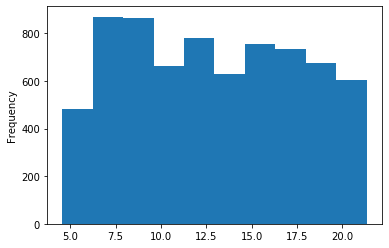

In [22]:
train["Item_Weight"].plot.hist()

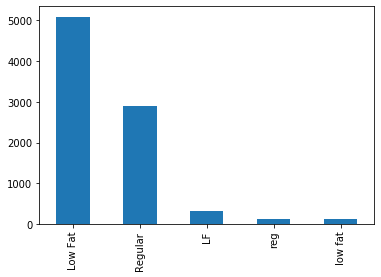

In [23]:
train["Item_Fat_Content"].value_counts().plot.bar()

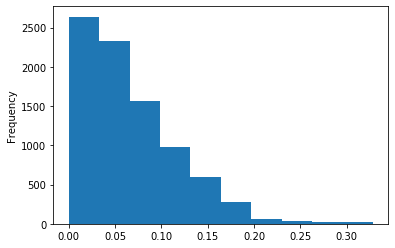

In [24]:
train["Item_Visibility"].plot.hist()

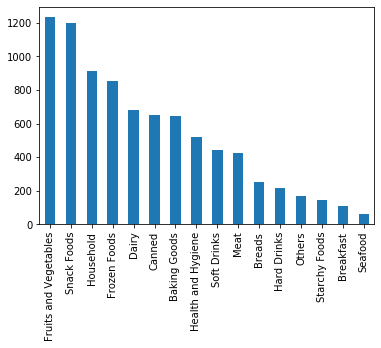

In [25]:
train["Item_Type"].value_counts().plot.bar()

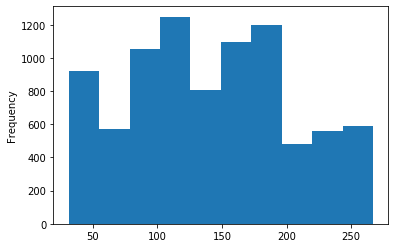

In [26]:
train["Item_MRP"].plot.hist()

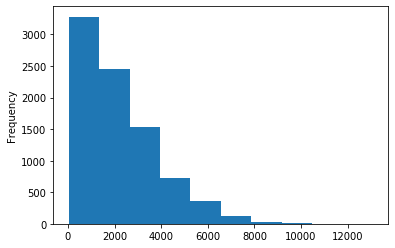

In [28]:
train["Item_Outlet_Sales"].plot.hist()

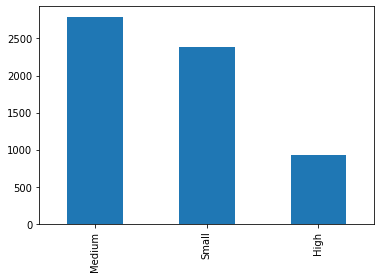

In [29]:
train["Outlet_Size"].value_counts().plot.bar()

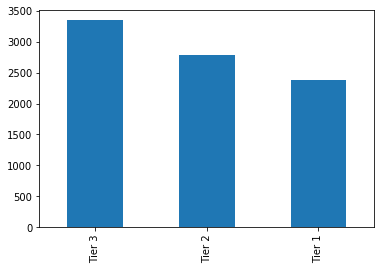

In [30]:
train["Outlet_Location_Type"].value_counts().plot.bar()

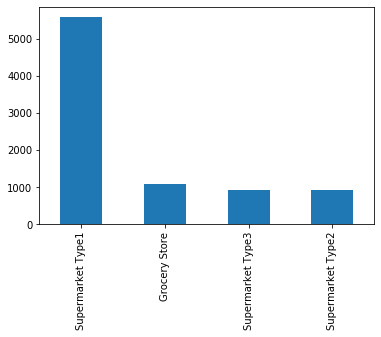

In [31]:
train["Outlet_Type"].value_counts().plot.bar()

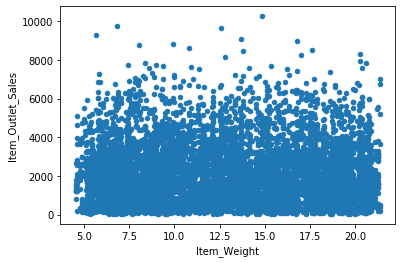

In [32]:
train.plot.scatter("Item_Weight","Item_Outlet_Sales")

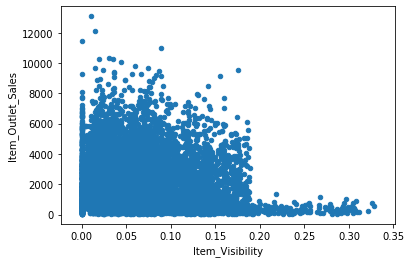

In [33]:

train.plot.scatter("Item_Visibility","Item_Outlet_Sales")

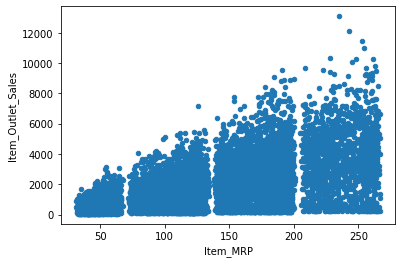

In [34]:
train.plot.scatter("Item_MRP","Item_Outlet_Sales")

In [35]:
train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
np.mean(train["Item_Weight"])

12.857645184136183

In [37]:
train["Item_Weight"].fillna(12.857645184136183,inplace=True)

In [38]:
train["Outlet_Size"].fillna("Medium",inplace = True)

In [39]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [40]:
test = pd.read_csv('Test_u94Q5KV.txt')

In [41]:
test=test.drop('Item_Identifier',axis=1)

In [42]:
test=test.drop('Outlet_Identifier',axis=1)

In [44]:
test.shape

(5681, 9)

In [46]:
train = pd.get_dummies(train)

In [48]:
train.shape

(8523, 36)

In [49]:
test.shape

(5681, 9)

In [50]:
test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [51]:
np.mean(test["Item_Weight"])

12.695633368756374

In [59]:
test["Item_Weight"].fillna(12.695633368756374,inplace=True)

In [60]:
test["Outlet_Size"].fillna("Medium",inplace = True)

In [61]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [62]:
test.shape

(5681, 9)

In [63]:
x_train = train.drop("Item_Outlet_Sales",axis=1)

In [64]:
y_train = train["Item_Outlet_Sales"]

In [65]:
test = pd.get_dummies(test)

In [66]:
lreg = LinearRegression()

In [70]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lreg.score(x_train,y_train)

0.563538862254919

In [72]:
train.shape

(8523, 36)

In [73]:
test.shape

(5681, 35)

In [74]:
predleg =lreg.predict(test)

In [75]:
predleg

array([1792.1034791 , 1467.40151762, 1882.38197173, ..., 1832.7227012 ,
       3628.51198813, 1298.03647644])

In [76]:
ttest=pd.read_csv('Test_u94Q5KV.txt')


In [77]:
pred=pd.DataFrame()

In [78]:
pred["Item_Identifier"]=ttest["Item_Identifier"]

In [79]:
pred["Outlet_Identifier"]=ttest["Outlet_Identifier"]

In [80]:
pred["Item_Outlet_Sales"]=predleg

In [81]:
pred.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1792.103479
1,FDW14,OUT017,1467.401518
2,NCN55,OUT010,1882.381972
3,FDQ58,OUT017,2621.118943
4,FDY38,OUT027,5138.499757


In [82]:
pred.to_csv('salePrediction.csv',header=True,index=False)

In [90]:
from PIL import Image

In [91]:
img=Image.open("score.png")

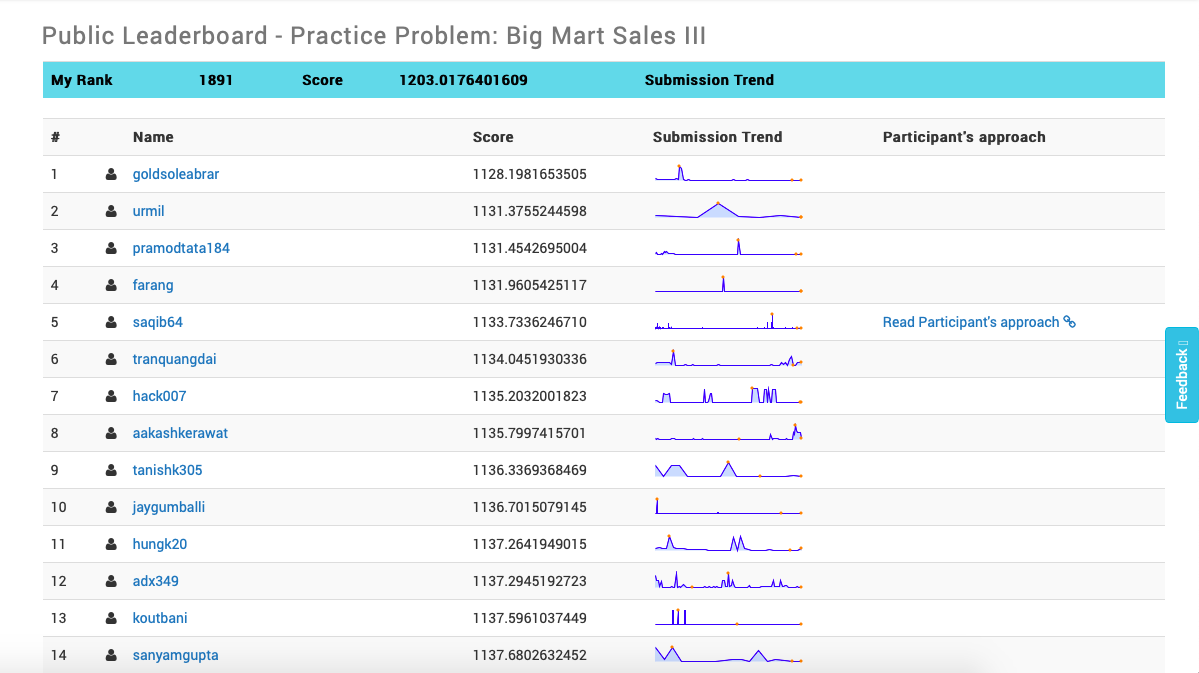

In [92]:
img

In [95]:
filemane = 'SampleSubmission_TmnO39y_1.txt'
pred.to_csv(filemane,index = False)
print('save file:'+ filemane)

save file:SampleSubmission_TmnO39y_1.txt
